In [1]:
from keras.models import load_model

AF_model = load_model('./AF vs non-AF/AF_nonAF.h5')
Noise_model = load_model('./Noise vs non-Noise/noise_nonNoise.h5')
Normal_model = load_model('./Normal vs non-Normal/Normal_nonNormal.h5')


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
from keras.utils import np_utils
import tensorflow as tf
np.set_printoptions(suppress=True)

testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)

print(testData.shape)
print(testLabel.shape)

(3041, 9000, 1)
(3041, 4)


In [3]:
# ONE_HOT_ENCODE_LABEL = {'A':0, '~':1, 'N':2, 'O':3}

results = []
for i in testData:
    i = i.reshape((1, testData.shape[1], 1))
    
    stage_1 = Noise_model.predict(i)
    if stage_1[0][0] < stage_1[0][1]:
        results.append(1)
    else:
        stage_2 = Normal_model.predict(i)
        if stage_2[0][0] < stage_2[0][1]:
            results.append(2)
        else:
            stage_3 = AF_model.predict(i)
            if stage_3[0][0] < stage_3[0][1]:
                results.append(0)
            else:
                results.append(3)


In [4]:
from sklearn.metrics import accuracy_score

score = accuracy_score(testL, results)
print(score)

0.8142058533377179


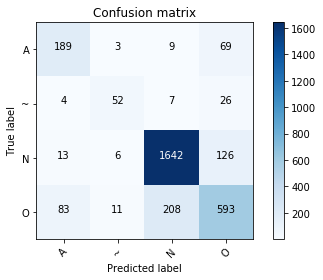

In [6]:
import itertools
import pylab as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(testL, results)
plot_confusion_matrix(cnf_matrix, classes=['A', '~', 'N', 'O'],
                      title='Confusion matrix')

In [7]:
from sklearn.metrics import f1_score
result = f1_score(testL, results, average=None)
result

array([0.67620751, 0.64596273, 0.89898713, 0.69397308])